# Excercise 1

In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [178]:
import numpy as np 

#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[3000,4],[4,2]])

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  eig_value=np.linalg.eigvals(A)
  return max(eig_value)/min(eig_value)

In [179]:
A=evalh(np.array([1,2]))

In [180]:
find_condition_number(A)

1504.0160463434236

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

#Question:4 Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix Q whose condition number needs to be analyzed in the new gradient scheme with scaling? 

#Yes,Matrix Q to analyzed in the new gradient scheme with scaling is

$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}\ \ \ $
Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function for $k^{th}$ iteration.

#Q5) Based on the matrix Q, can you come up with a useful choice for Dk (assuming Dk to be diagonal)?

$$\mathbf{D^k}=\begin{bmatrix}
\frac{1}{3000} & 0 \\ 0 & \frac{1}{2}
\end{bmatrix}$$

where $\mathbf{D^k}$ is the diagonal matrix.

In [181]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  a11=1/3000
  a12=0
  a21=0
  a22=1/2
  return np.array([[a11,a12],[a21,a22]])
  

In [182]:
compute_D_k(np.array([1,1]))

array([[3.33333333e-04, 0.00000000e+00],
       [0.00000000e+00, 5.00000000e-01]])

In [183]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it
  return 1500*(x[0]**2)+4*x[0]*x[1]+x[1]**2 
  


In [184]:
evalf(np.array([1,1]))

1505

In [185]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([3000*x[0]+4*x[1],4*x[0]+2*x[1]])
  

In [186]:
evalg(np.array([1,1])).shape

(2,)

In [187]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
  step_length=(np.dot(gradf.T,gradf)) / (np.matmul(np.matmul(gradf,2*A),gradf)) 
  
  return step_length
  

In [188]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  #Complete the code 
  alpha = alpha_start
  p=rho
  y=gamma
  #implement the backtracking line search
  while evalf(x+alpha*(-gradf)) > evalf(x)-y*alpha*np.dot((gradf.T),gradf):
    alpha=p*alpha


  #print('final step length:',alpha)
  return alpha
  
  

In [189]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p = - gradf
  D_k = compute_D_k(x)
  r=rho
  y=gamma
  while evalf(x + alpha*np.matmul(D_k,p)) > evalf(x) + y*alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha=alpha*r
  return alpha

  
  
  

In [190]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [191]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  A=np.array([[1500,2],[2,1]])

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x ,k  


In [192]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  A = np.array([[1500, 2], [2, 1]])
  D_k = compute_D_k(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k
  

# Question 7 answer

In [193]:
my_start_x=np.array([4.,4.])
my_tol=1e-5
#check gradient descent with exact line search 
x_opt,iterations = find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print(f'Value of optimizer for exact step length= {x_opt}\nMinimum value is= {evalf(x_opt)}\nNumber of iterations= {iterations}\n ')
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x_opt_bls,iterations = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho,gamma)
print(f"Value of optimizer for Backtracking line search ={x_opt_bls} \nMinimum value is= {evalf(x_opt_bls)}\nNumber of iterations are= {iterations}\n")
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x_opt_bls,iterations = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho,gamma)
print(f"Value of optimizer for Backtracking scaled line search ={x_opt_bls} \nMinimum value is= {evalf(x_opt_bls)}\nNumber of iterations are= {iterations}\n")

Value of optimizer for exact step length= [-2.32108719e-09  1.73908326e-06]
Minimum value is= 3.0163454977802733e-12
Number of iterations= 5
 
Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5
Value of optimizer for Backtracking line search =[-7.41280132e-09  4.58747524e-06] 
Minimum value is= 2.0991329363516383e-11
Number of iterations are= 8194

Value of optimizer for Backtracking scaled line search =[ 7.57844280e-11 -3.79259259e-08] 
Minimum value is= 1.43549399821784e-15
Number of iterations are= 9



In [194]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [195]:
#check gradient descent with exact line search 
x_opt,iterations = find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print(f'Value of optimizer for exact step length= {x_opt}\nMinimum value is= {evalf(x_opt)}\nNumber of iterations= {iterations} ')

Value of optimizer for exact step length= [-7.44595231e-16  4.61544291e-13]
Minimum value is= 2.1248011077913554e-25
Number of iterations= 14075 


In [196]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x_opt_bls,iterations = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho,gamma)
print(f"Value of optimizer for Backtracking line search ={x_opt_bls} \nMinimum value is= {evalf(x_opt_bls)}\nNumber of iterations are= {iterations}")

Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5
Value of optimizer for Backtracking line search =[-4.78532202e-16  4.53575301e-13] 
Minimum value is= 2.0520584176089396e-25
Number of iterations are= 21985


In [197]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x_opt_bls,iterations = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho,gamma)
print(f"Value of optimizer for Backtracking scaled line search ={x_opt_bls} \nMinimum value is= {evalf(x_opt_bls)}\nNumber of iterations are= {iterations}")

Value of optimizer for Backtracking scaled line search =[-2.31674405e-18  9.60515434e-16] 
Minimum value is= 9.217397790469283e-31
Number of iterations are= 16


# Observation:= Here we can see that no. of iteration of gradient descent with scaling is 16 and iteration of gradient descent without scaling is 21985. so gradient descent with scaling takes very less no. of iteration than gradient descent without scaling and gradient with exact line search which have 14075 iteration.

## 9)

In [198]:
my_start_x=np.array([1.,4000.])
my_tol=1e-12
list_of_alpha=[1.,0.9,0.75,0.6,0.5, 0.4, 0.25, 0.1, 0.01]
opt_with_scaling=[]
opt_without_scaling=[]
iterations_scaling=[]
iterations_without_scaling=[]
for alpha in list_of_alpha:
  print(f'For alpha={alpha}')
  print("For backtracking with scaling process:")
  opt_bt_scale,k=find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha,0.5,0.5)
  print(f"Value of optimizer ={opt_bt_scale} \nMinimum value is= {evalf(opt_bt_scale)}\nNumber of iterations are= {k}\n")

  opt_with_scaling.append(opt_bt_scale)
  iterations_scaling.append(k)
  print("For backtracking without scaling process:")
  opt_bt,k1=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,0.5,0.5)
  print(f"Value of optimizer ={opt_bt} \nMinimum value is= {evalf(opt_bt)}\nNumber of iterations are= {k1}\n")
  opt_without_scaling.append(opt_bt)
  iterations_without_scaling.append(k1)
  
print("optimizer with scaling = ",opt_with_scaling)
print("optimizer without scaling = ",opt_without_scaling)
print("No. of Iterations with scaling = ",iterations_scaling)
print("No. of Iterations without scaling = ",iterations_without_scaling)

For alpha=1.0
For backtracking with scaling process:
Value of optimizer =[-2.31674405e-18  9.60515434e-16] 
Minimum value is= 9.217397790469283e-31
Number of iterations are= 16

For backtracking without scaling process:
Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5
Value of optimizer =[-4.78532202e-16  4.53575301e-13] 
Minimum value is= 2.0520584176089396e-25
Number of iterations are= 21985

For alpha=0.9
For backtracking with scaling process:
Value of optimizer =[-1.54825431e-16  5.99636318e-15] 
Minimum value is= 6.819918471923904e-29
Number of iterations are= 21

For backtracking without scaling process:
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
Value of optimizer =[-5.48799355e-16  4.71515450e-13] 
Minimum value is= 2.2174352131747877e-25
Number of iterations are= 15941

For alpha=0.75
For backtracking with scaling process:
Value of optimizer =[-2.78273450e-16  1.07784868e-14] 
Minimum value is= 2.203324807217381e-28
Number of iterations 

In [199]:
import pandas as pd

data=pd.DataFrame(columns = ['alpha',"optimizer with scaling","optimizer without scaling","No. of Iterations with scaling","No. of Iterations without scaling"])

In [200]:
data["alpha"] = list_of_alpha
data["optimizer with scaling"] = opt_with_scaling
data["optimizer without scaling"] = opt_without_scaling
data["No. of Iterations with scaling"] = iterations_scaling
data["No. of Iterations without scaling"]=iterations_without_scaling

In [201]:
data

alpha                             optimizer with scaling  \
0   1.00     [-2.316744047553897e-18, 9.60515433622923e-16]   
1   0.90    [-1.5482543147260356e-16, 5.99636318467777e-15]   
2   0.75   [-2.782734498100471e-16, 1.0778486826534047e-14]   
3   0.60    [-3.37385169273731e-16, 1.3084958830436248e-14]   
4   0.50   [-2.5114451187192196e-16, 9.759498958643004e-15]   
5   0.40  [-3.2653089003091313e-16, 1.2731597062010807e-14]   
6   0.25  [-2.6885302583317696e-16, 1.0548078839184993e-14]   
7   0.10   [-3.348151030522908e-16, 1.3248133670865728e-14]   
8   0.01   [-3.510287787686166e-16, 1.3967083594059075e-14]   

                         optimizer without scaling  \
0  [-4.78532202235693e-16, 4.5357530103475063e-13]   
1  [-5.487993551241559e-16, 4.715154501382426e-13]   
2  [-7.186438911351236e-16, 4.891753784493455e-13]   
3  [-6.075542263113186e-16, 4.940366355448921e-13]   
4  [-4.78532202235693e-16, 4.5357530103475063e-13]   
5  [-7.240913284450493e-16, 4.844548192685841e-13]   
6  [-4.78532202235693e-16, 4.5357530103475063e-13]   
7  [-7.240913284450493e-16, 4.844548192685841e-13]   
8   [-5.808527879098581e-16, 4.86459734614113e-13]   

   No. of Iterations with scaling  No. of Iterations without scaling  
0                              16                              21985  
1                              21                              15941  
2                              32                               6750  
3                              47                               6887  
4                              62                              21985  
5                              83                              11362  
6                             147                              21985  
7                             397                              11362  
8                            4146                               5509

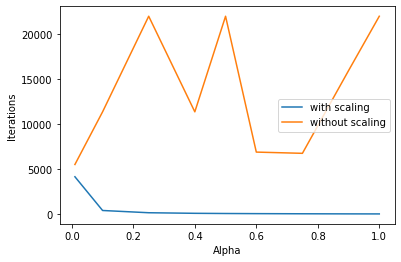

In [202]:
import matplotlib.pyplot as plt
plt.plot(list_of_alpha,iterations_scaling,label="with scaling")
plt.plot(list_of_alpha,iterations_without_scaling,label="without scaling")
plt.xlabel("Alpha")
plt.ylabel("Iterations")
plt.legend()




# observation:  here we can that the no. of iteration with scaling is decreses as we increses the alpha values. and in the no. of iteration without scaling we can see that there is no pattern for increasing value.

In [203]:
my_start_x=np.array([1.,4000.])
my_tol=1e-12
list_of_rho=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
opt_with_scaling=[]
opt_without_scaling=[]
iterations_scaling=[]
iterations_without_scaling=[]
for r in list_of_rho:
  print(f'For rho = {r}')
  print("For backtracking with scaling process:")
  opt_bt_scale,k=find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.,r,0.5)
  print(f"Value of optimizer ={opt_bt_scale} \nMinimum value is= {evalf(opt_bt_scale)}\nNumber of iterations are= {k}\n")

  opt_with_scaling.append(opt_bt_scale)
  iterations_scaling.append(k)
  print("For backtracking without scaling process:")
  opt_bt,k1=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,1.,r,0.5)
  print(f"Value of optimizer ={opt_bt} \nMinimum value is= {evalf(opt_bt)}\nNumber of iterations are= {k1}\n")
  opt_without_scaling.append(opt_bt)
  iterations_without_scaling.append(k1)

print("optimizer with scaling = ",opt_with_scaling)
print("optimizer without scaling = ",opt_without_scaling)
print("No. of Iterations with scaling = ",iterations_scaling)
print("No. of Iterations without scaling = ",iterations_without_scaling)

For rho = 0.9
For backtracking with scaling process:
Value of optimizer =[-1.90920422e-16  3.38018326e-15] 
Minimum value is= 6.352016622002106e-29
Number of iterations are= 14

For backtracking without scaling process:
Params for Backtracking LS: alpha start: 1.0 rho: 0.9  gamma: 0.5
Value of optimizer =[-6.44686128e-16  4.90962904e-13] 
Minimum value is= 2.404019351870065e-25
Number of iterations are= 127

For rho = 0.8
For backtracking with scaling process:
Value of optimizer =[-3.89959677e-18  7.65599523e-16] 
Minimum value is= 5.970107943515186e-31
Number of iterations are= 15

For backtracking without scaling process:
Params for Backtracking LS: alpha start: 1.0 rho: 0.8  gamma: 0.5
Value of optimizer =[-6.99968590e-16  4.40149178e-13] 
Minimum value is= 1.932338703071826e-25
Number of iterations are= 1471

For rho = 0.75
For backtracking with scaling process:
Value of optimizer =[-3.59593964e-18  9.57478862e-16] 
Minimum value is= 9.223897999650174e-31
Number of iterations are= 

In [204]:
import pandas as pd

data=pd.DataFrame(columns = ['rho',"optimizer with scaling","optimizer without scaling","No. of Iterations with scaling","No. of Iterations without scaling"])

In [205]:
data["rho"] = list_of_rho
data["optimizer with scaling"] = opt_with_scaling
data["optimizer without scaling"] = opt_without_scaling
data["No. of Iterations with scaling"] = iterations_scaling
data["No. of Iterations without scaling"]=iterations_without_scaling

In [206]:
data

rho                             optimizer with scaling  \
0  0.90   [-1.9092042213077373e-16, 3.380183264746269e-15]   
1  0.80     [-3.89959676878535e-18, 7.655995229995428e-16]   
2  0.75   [-3.5959396433470515e-18, 9.574788623685416e-16]   
3  0.60  [-2.6849682670327978e-18, 1.5331168804755377e-15]   
4  0.50     [-2.316744047553897e-18, 9.60515433622923e-16]   
5  0.40     [-2.10920878607549e-18, 1.381556814583143e-15]   
6  0.25    [-6.953460896912427e-16, 4.556167401798507e-13]   
7  0.10    [-6.228928050404154e-16, 4.519190777635757e-13]   
8  0.01   [-5.886321506527121e-16, 4.3992833747881766e-13]   

                         optimizer without scaling  \
0  [-6.446861279611556e-16, 4.909629036648014e-13]   
1   [-6.999685895038314e-16, 4.40149177738863e-13]   
2  [-7.154548419113444e-16, 4.836165432291504e-13]   
3  [-7.076917480920231e-16, 4.704696426820575e-13]   
4  [-4.78532202235693e-16, 4.5357530103475063e-13]   
5   [-5.164614600660655e-16, 4.67846628772093e-13]   
6  [-5.671289538913564e-16, 4.701771321593421e-13]   
7  [-4.352244280414063e-16, 4.426447245098114e-13]   
8  [-6.038919238396365e-16, 4.899726720990987e-13]   

   No. of Iterations with scaling  No. of Iterations without scaling  
0                              14                                127  
1                              15                               1471  
2                              15                               3135  
3                              15                              15834  
4                              16                              21985  
5                              16                              20049  
6                              16                              24570  
7                              23                              45435  
8                             130                              17463

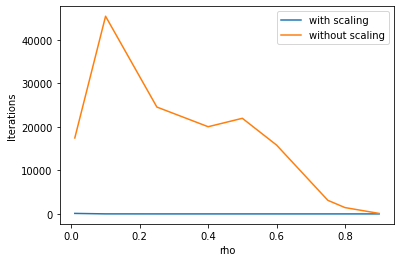

In [207]:
import matplotlib.pyplot as plt
plt.plot(list_of_rho,iterations_scaling,label="with scaling")
plt.plot(list_of_rho,iterations_without_scaling,label="without scaling")
plt.xlabel("rho")
plt.ylabel("Iterations")
plt.legend()




# Observation:= We can see that the no. iteration of with scaling is increasing slowly as we increses the rho value. and in the no. of iteration in without scaling decreses when rho is from 0.1 to 0.9.